In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [2]:
source = "multi"
max_n_cluster = 20
dir_path = "output/" + source + "/"

In [3]:
data_encode = np.genfromtxt(dir_path + "data.csv", delimiter = ",")
print(data_encode.shape)

(487, 1000)


In [4]:
tsne = TSNE(n_components = 2, perplexity = 10, random_state = 3407)
data_2d = tsne.fit_transform(data_encode)
# plt.scatter(data_2d[:, 0], data_2d[:, 1], marker = ".", alpha = 0.5)

C:\Users\shiti\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shiti\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Histogram of number of elements in each cluster.

(487,)


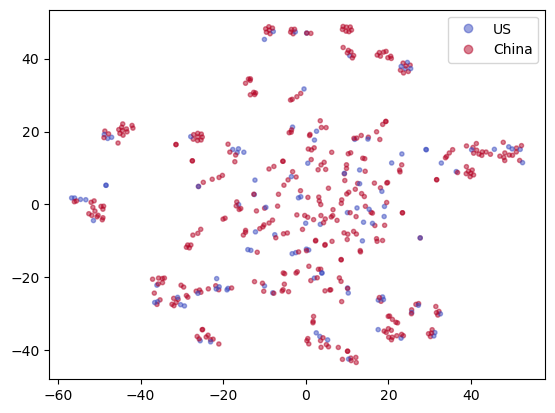

In [5]:
if source == "multi":
    data_label = np.genfromtxt(dir_path + "data_label.csv", delimiter = ",")
    print(data_label.shape)
    fig = plt.scatter(data_2d[:, 0], data_2d[:, 1], c = -data_label, cmap = "coolwarm", marker = ".", alpha = 0.5)
    plt.legend(fig.legend_elements()[0], ["US", "China"])

In [21]:
gmm = GaussianMixture(n_components = 2, max_iter = 1000, random_state = 3407)
gmm.fit(data_encode)

GaussianMixture(max_iter=1000, n_components=2, random_state=3407)

In [22]:
pred_class = gmm.predict(data_encode)

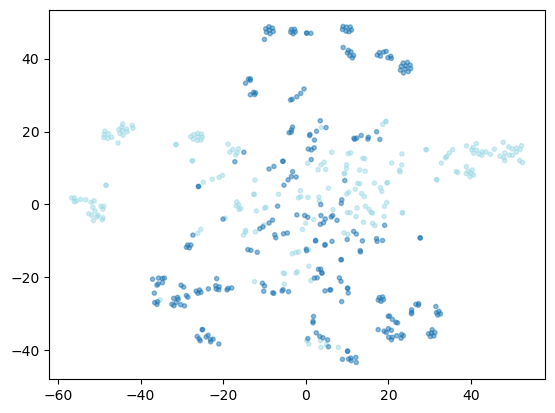

In [23]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c = pred_class, cmap = "tab20", marker = ".", alpha = 0.5)

In [26]:
data_gmm = pd.DataFrame({"clust": pred_class, "label": data_label})

In [27]:
data_gmm.groupby("clust").count()

,label
clust,
0,275
1,212


In [24]:
np.where(pred_class == 0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,  11,  12,  14,  17,  20,
         27,  29,  30,  32,  38,  39,  42,  43,  45,  46,  47,  48,  50,
         53,  55,  59,  60,  61,  62,  65,  66,  67,  69,  71,  72,  73,
         76,  79,  80,  81,  82,  83,  85,  88,  90,  92,  93, 100, 102,
        104, 106, 110, 111, 114, 117, 118, 119, 121, 124, 125, 126, 127,
        128, 131, 132, 133, 134, 136, 141, 142, 143, 144, 145, 152, 153,
        154, 156, 157, 158, 159, 161, 164, 167, 168, 173, 174, 177, 178,
        179, 181, 182, 184, 185, 188, 191, 192, 194, 197, 199, 200, 201,
        204, 206, 208, 210, 211, 213, 214, 215, 217, 218, 219, 220, 221,
        223, 225, 226, 227, 228, 230, 232, 234, 235, 236, 237, 238, 239,
        241, 242, 243, 244, 245, 246, 249, 252, 253, 256, 257, 258, 259,
        262, 263, 265, 268, 269, 272, 276, 279, 280, 281, 282, 283, 284,
        285, 286, 287, 292, 293, 294, 295, 296, 297, 298, 299, 301, 302,
        306, 307, 309, 310, 312, 314, 315, 318, 319

In [19]:
pred_class

array([ 6,  7,  1,  3,  7,  3,  6,  6, 10,  8,  2,  0,  0, 10,  6, 11,  9,
        0,  3,  2,  6, 10,  8,  8,  1,  5,  1,  6,  8,  3,  9,  8,  0,  1,
        8,  2,  2,  2,  6,  4,  4,  4,  9,  1,  2,  9,  4, 11, 11, 11,  7,
        2,  2,  6,  8,  1,  3,  9,  8,  6,  4,  5,  9, 10,  8,  6,  9,  7,
        1,  5,  4,  9,  6, 11,  1,  3,  0,  8,  8,  9,  0,  7,  9,  9, 10,
        5,  2,  5,  9, 10,  7,  2, 10,  5,  1, 10,  8, 10,  2,  8,  0,  1,
       10,  1,  5,  8,  0,  1,  2,  2,  5,  0,  3,  8,  9, 11,  4,  5,  9,
        4,  3,  0,  9,  9,  6,  0,  7,  3,  3,  2,  8,  9,  9,  6,  7,  8,
        9,  2,  8,  8,  1,  3,  9,  0,  4,  6,  3, 10,  2,  8, 10,  8,  9,
        6,  5,  8,  6,  6,  9,  0, 11,  6,  8,  8,  5,  2,  2,  3,  3,  1,
        8,  4, 10,  3,  1, 11, 10,  5,  9,  4,  8,  4, 10, 10,  5, 11,  3,
        2,  7,  8, 10,  5,  3,  3,  6,  8,  1,  9,  8,  9,  6,  6,  1, 10,
        7,  8,  6,  1,  1,  8,  6,  6,  8,  6,  1,  4,  8,  5,  6,  0,  9,
        6,  9,  9,  8,  4

In [28]:
gmm.predict_proba(data_encode)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
avg_inter_dist = []
avg_cross_dist = []
for k in range(2, max_n_cluster):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data_encode)

    inter_dist_mat = kmeans.transform(data_encode)
    avg_inter_dist.append(np.mean(np.min(inter_dist_mat, axis = 1)))

    cross_dist_mat = np.zeros((k, k))
    for i in range(k - 1):
        for j in range(i + 1, k):
            cross_dist_mat[i, j] = np.linalg.norm(kmeans.cluster_centers_[i, :] - kmeans.cluster_centers_[j, :], ord = 2)

    avg_cross_dist.append(np.sum(cross_dist_mat) / k / (k - 1))

In [ ]:
plt.plot(range(2, max_n_cluster), avg_inter_dist, ".-")
# plt.xticks(range(0, 25, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("Inter-Cluster Distance")

In [ ]:
plt.plot(range(2, max_n_cluster), avg_cross_dist, ".-")
# plt.xticks(range(0, 25, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("Cross-Cluster Distance")

In [ ]:
pop_array = np.zeros((max_n_cluster - 2, max_n_cluster - 1))
for k in range(2, max_n_cluster):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data_encode)
    # plt.scatter(data_2d[:, 0], data_2d[:, 1], c = kmeans.labels_, cmap = "tab20", marker = ".", alpha = 0.5)
    # plt.savefig(dir_path + "cluster/tsne_{}_clusters.png".format(k))
    clust_pop = np.unique(kmeans.labels_, return_counts = True)
    for i, population in enumerate(np.sort(-clust_pop[1])):
        pop_array[k - 2, i] = -population

pop_array

In [ ]:
cum_pop = np.cumsum(pop_array, axis = 1)
cum_pop

In [ ]:
plt.bar(range(2, max_n_cluster), pop_array[:, 0])
for i in range(max_n_cluster - 2):
    plt.bar(range(2, max_n_cluster), pop_array[:, i + 1], bottom = cum_pop[:, i])

# plt.xticks(range(0, 25, 5))
plt.xlabel("Number of clusters")
plt.ylabel("Population in each cluster")

In [ ]:
k = 7
kmeans = KMeans(n_clusters = k)
kmeans.fit(data_encode)

In [ ]:
np.unique(kmeans.labels_, return_counts = True)

In [ ]:
np.where(kmeans.labels_ == 0)